In [45]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_Data = pd.read_csv("data/city_data.csv")
Ride_Data = pd.read_csv("data/ride_data.csv")
RideData.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [46]:
# Combine the data into a single dataset
City_Ride = pd.merge(RideData,CityData,how='left',on='city')

# Display the data table for preview
City_Ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [47]:
# Obtain the x and y coordinates for each of the three city types
GCity_Ride = City_Ride.groupby(['city']+['type']+['driver_count'])

Ave_Fare = GCity_Ride['fare'].mean()
Total_Rides = GCity_Ride['ride_id'].count()

df = pd.DataFrame({"AveFare":Ave_Fare, "TotalRides":Total_Rides})
df = df.reset_index()

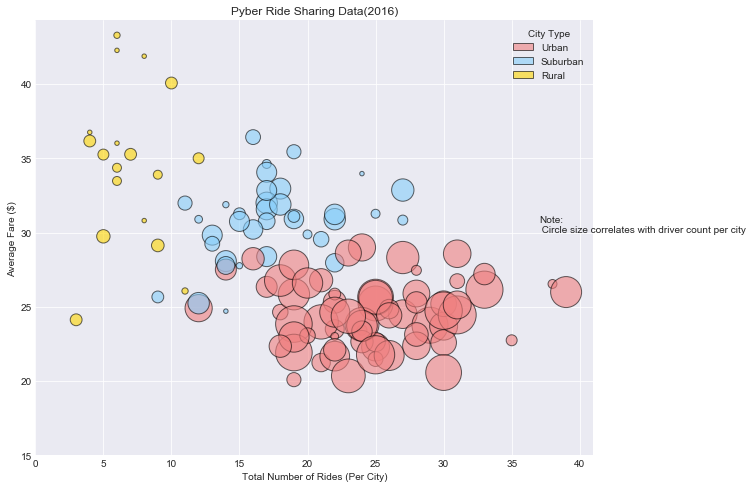

<Figure size 432x288 with 0 Axes>

In [48]:
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}
# Build the scatter plots for each city types
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['TotalRides'], df['AveFare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')


# Incorporate the other graph properties
ax.set_xlim(0, max(df['TotalRides'])+2)
ax.set_ylim(15, max(df['AveFare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")
ax.text(37,30,'Note:\n Circle size correlates with driver count per city')

# Create a legend
ax.legend([Urban,Suburban,Rural],["Urban","Suburban","Rural"],title= 'City Type')

# Incorporate a text label regarding circle size
Urban = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
Suburban = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
Rural = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black", linewidth=1)

# Show plot
plt.show()

# Save Figure
plt.savefig('Pyber Ride Sharing Data(2016).png')

## Total Fares by City Type

In [49]:
# Calculate Type Percents
GType = City_Ride.groupby(['type'])
GGType = City_Data.groupby(['type'])
TFare = GType['fare'].sum()
TRides = GType['ride_id'].count()
TDrivers = GGType['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
df1


,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,78
1,Suburban,19356.33,625,490
2,Urban,39854.38,1625,2405


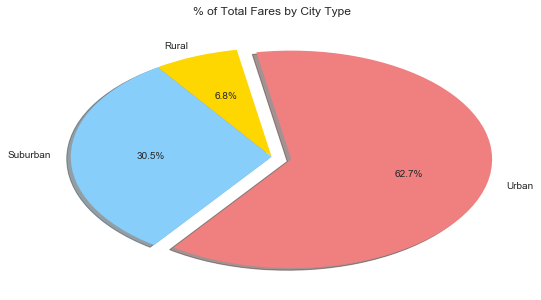

<Figure size 432x288 with 0 Axes>

In [50]:
# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
labels = df1['type']
sizes = df1['TotalFare']

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Fares by City Type")

# Show Figure
plt.show()

# Save Figure
plt.savefig('% of Total Fares by City Type.png', bbox_inches=None)


## Total Rides by City Type

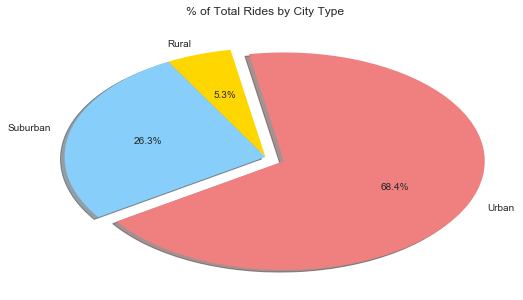

<Figure size 432x288 with 0 Axes>

In [51]:
# Calculate Ride Percents
colors = ["gold", "lightskyblue", "lightcoral"]
labels = df1['type']
sizes = df1['TotalRides']


# Build Pie Chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig('% of Total Rides by City Type.png', bbox_inches=None)

## Total Drivers by City Type

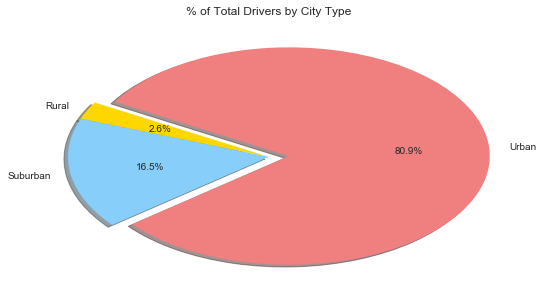

<Figure size 432x288 with 0 Axes>

In [52]:
# Parameters
colors = ["gold", "lightskyblue", "lightcoral"]
labels = df1['type']
sizes = df1['TotalDrivers']

# Build Pie Chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
            

plt.title("% of Total Drivers by City Type")

plt.show()

# Save Figure
plt.savefig('% of Total Drivers by City Type.png', bbox_inches=None)